In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches
import itertools
from matplotlib.ticker import AutoMinorLocator

In [2]:
# settings
sns.set_style("darkgrid")
ID = "0620"
figure_path = "figs" + os.sep + ID + os.sep
folder_structure = True

if not os.path.exists(figure_path):
    os.makedirs(figure_path)

In [3]:
# colors we use in the figures
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [4]:
# Here we load the data
if not folder_structure:
    file_name = "../results/results_" + ID + ".csv"
    data = pd.read_csv(file_name, index_col = None)
else:
    directory = "../results/results_" + ID + "_main"
    idx = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if not filename.endswith(".csv"):
            continue
        newdata = pd.read_csv(f, index_col = None)
        if idx == 0:
            data = newdata
        else:
            data = pd.concat([data, newdata], ignore_index=True)
        idx += 1

full_data = data.copy(deep=True)
data = data.loc[(data["init_canSendMessages"] == True) & (data["resp_canSendMessages"] == True)] # & (data["init_canInitiallyReachGP"] == False) & (data["init_canInitiallyReachGP.1"] == False)

In [5]:
# check the column names
print(data.columns)
print(len(full_data))
print(len(data))

Index(['init_tom', 'resp_tom', 'init_lr', 'resp_lr', 'init_canSendMessages',
       'resp_canSendMessages', 'init_canLie', 'resp_canLie', 'init_initPoints',
       'resp_initPoints', 'init_finalPoints', 'resp_finalPoints', 'init_gain',
       'resp_gain', 'init_canInitiallyReachGP', 'resp_canInitiallyReachGP',
       'init_zeroToMProb', 'resp_zeroToMProb', 'init_numberOfMessagesSent',
       'resp_numberOfMessagesSent', 'init_numberOfTimesLied',
       'resp_numberOfTimesLied', 'init_highestValueParetoOutcome',
       'resp_highestValueParetoOutcome',
       'init_highestValueStrictParetoOutcome',
       'resp_highestValueStrictParetoOutcome', 'nr_offers',
       'outcome_is_StrictPE', 'outcome_is_highestSW',
       'outcome_is_new_distribution',
       'there_is_better_outcome_than_initial_situ', 'reached_max_num_offers',
       'passed_time'],
      dtype='object')
48657
24825


In [6]:
# av_data = data.groupby(["init_tom", "resp_tom", "init_canSendMessages", "resp_canSendMessages", "init_canLie", "resp_canLie"]).mean()
# data = data[data["outcome"]] only configure situations where there is a better outcome.
# pd.set_option('display.max_rows', None)
# print(av_data[["init_gain"]])
# pd.reset_option('display.max_rows')

In [7]:
# BOXPLOT
# df_init0_mean = df_init0.groupby(["resp_tom", "resp_canLie"]).mean()
# df_init0_se = df_init0.groupby(["resp_tom", "resp_canLie"]).sem()
# names = ["ToM=" + ",\nlying=".join(map(str, name)) for name in list(df_init0_mean.index)]

# plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
# plt.bar(names, df_init0_mean["init_gain"], width = 0.4)
# plt.errorbar(names, df_init0_mean["init_gain"], yerr=df_init0_se["init_gain"], fmt='.', ecolor='red', color='blue')
# plt.ylabel('Initiator gain', size=16)
# plt.xlabel('Responder type', labelpad=10, size=16)

In [8]:
# figure settings
INIT_COL = sns.color_palette('colorblind')[0]
RESP_COL = sns.color_palette('colorblind')[1]

('init', 1, True)
('init', 1, False)
('init', 2, True)
('init', 2, False)
('resp', 1, True)
('resp', 1, False)
('resp', 2, True)
('resp', 2, False)
('init', 0, True)
('resp', 0, True)


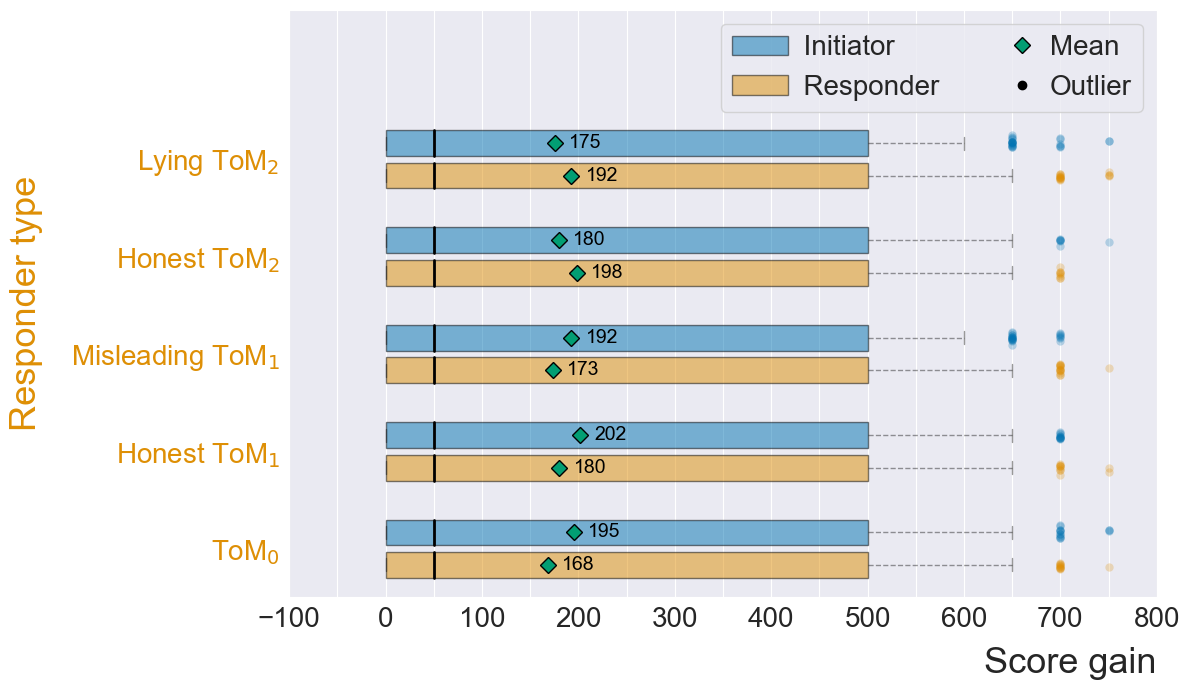

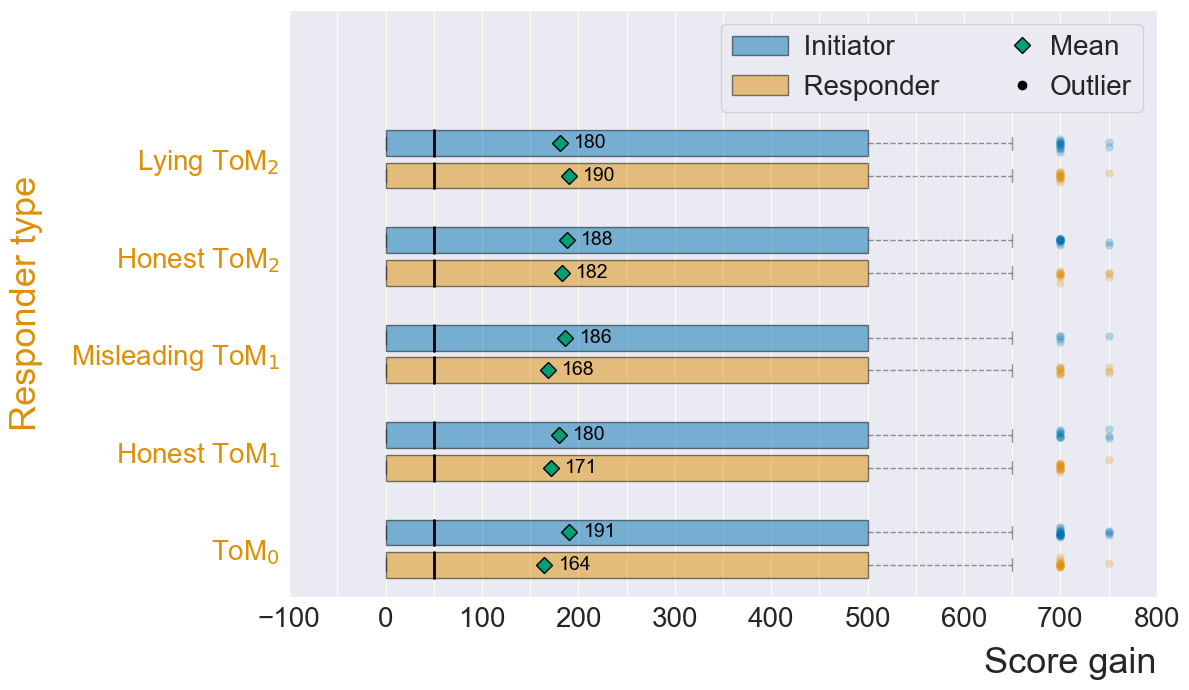

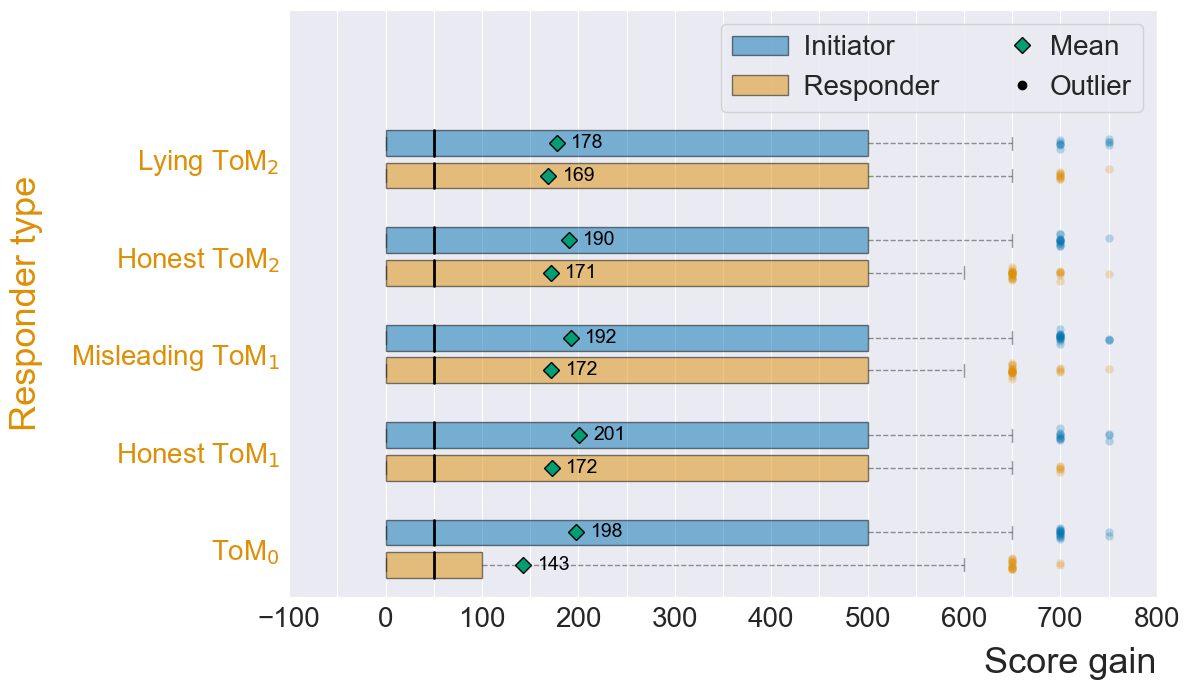

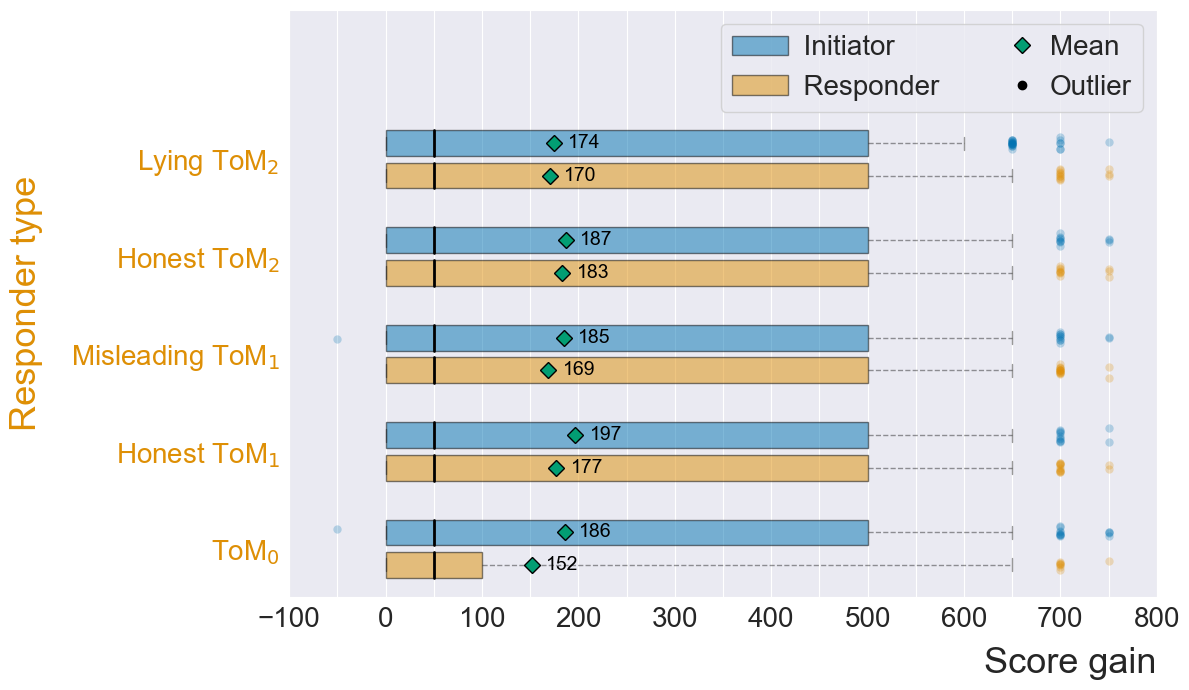

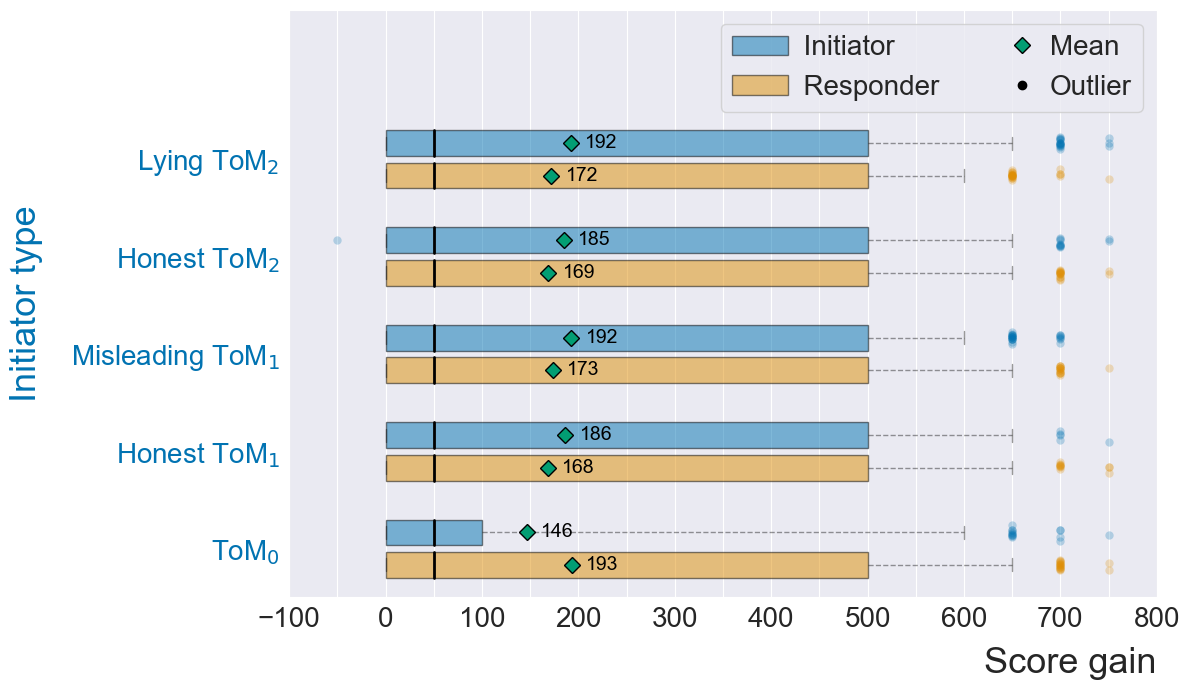

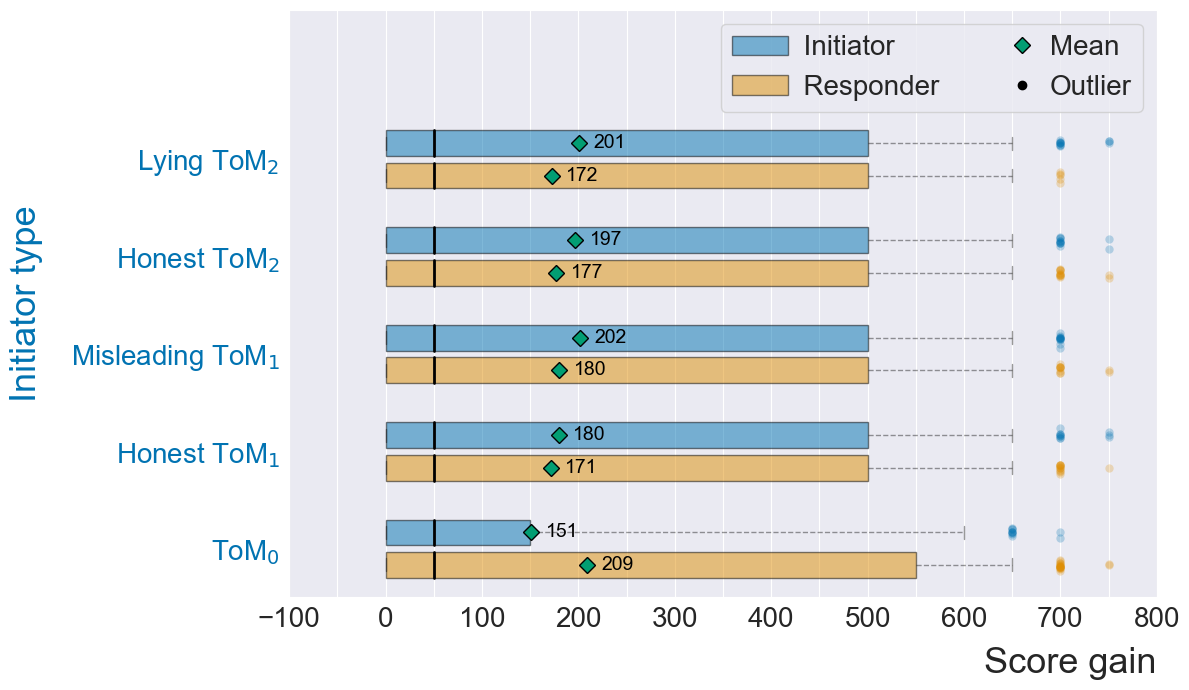

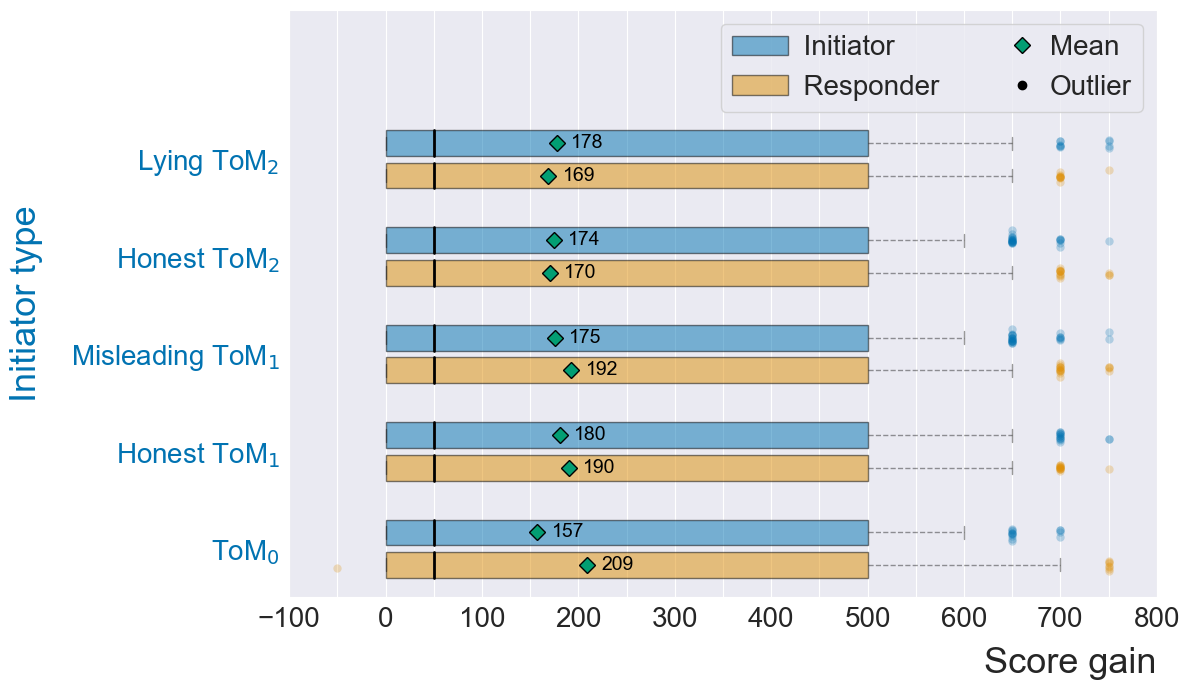

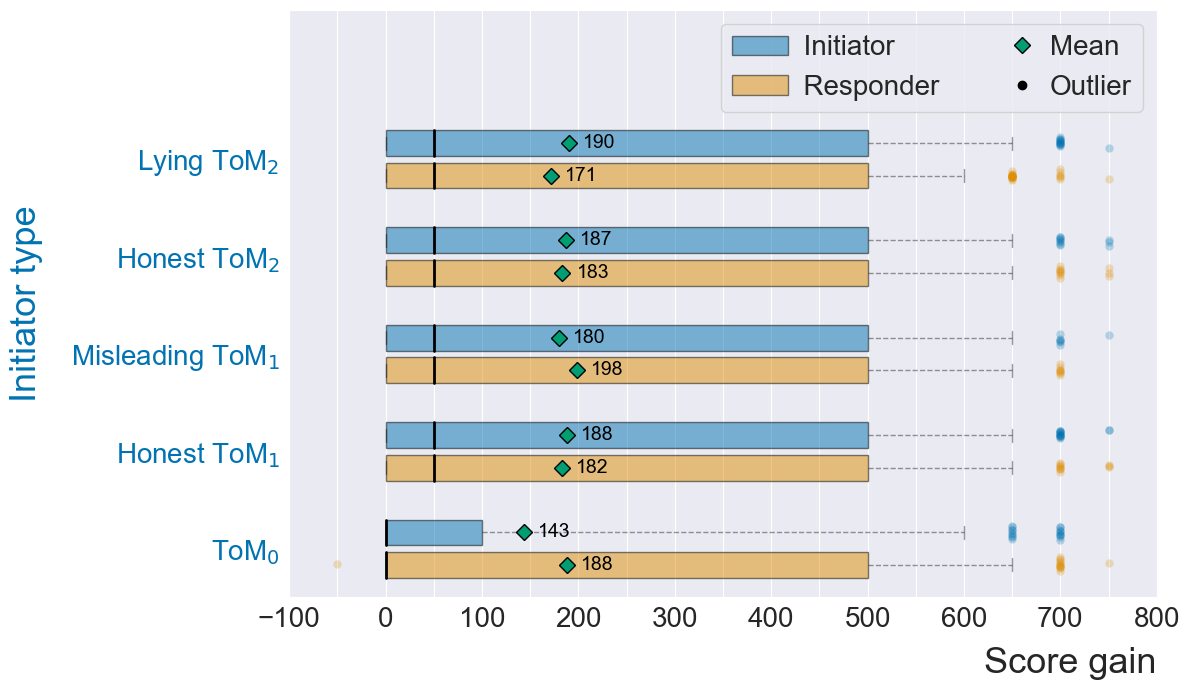

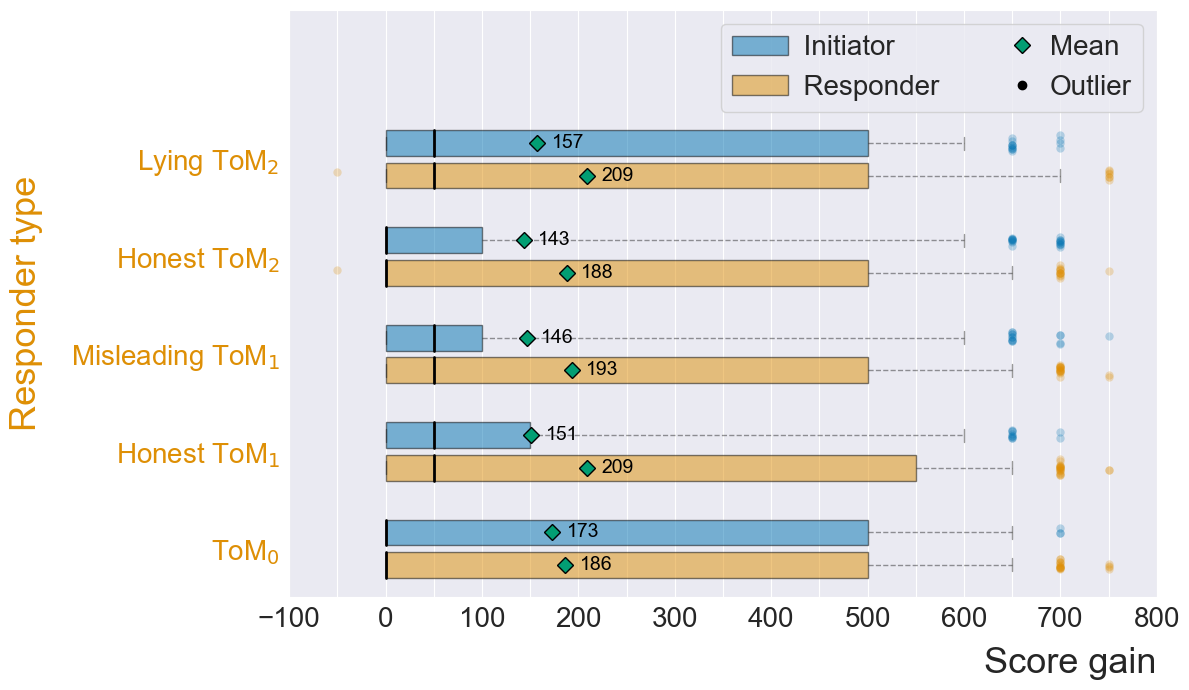

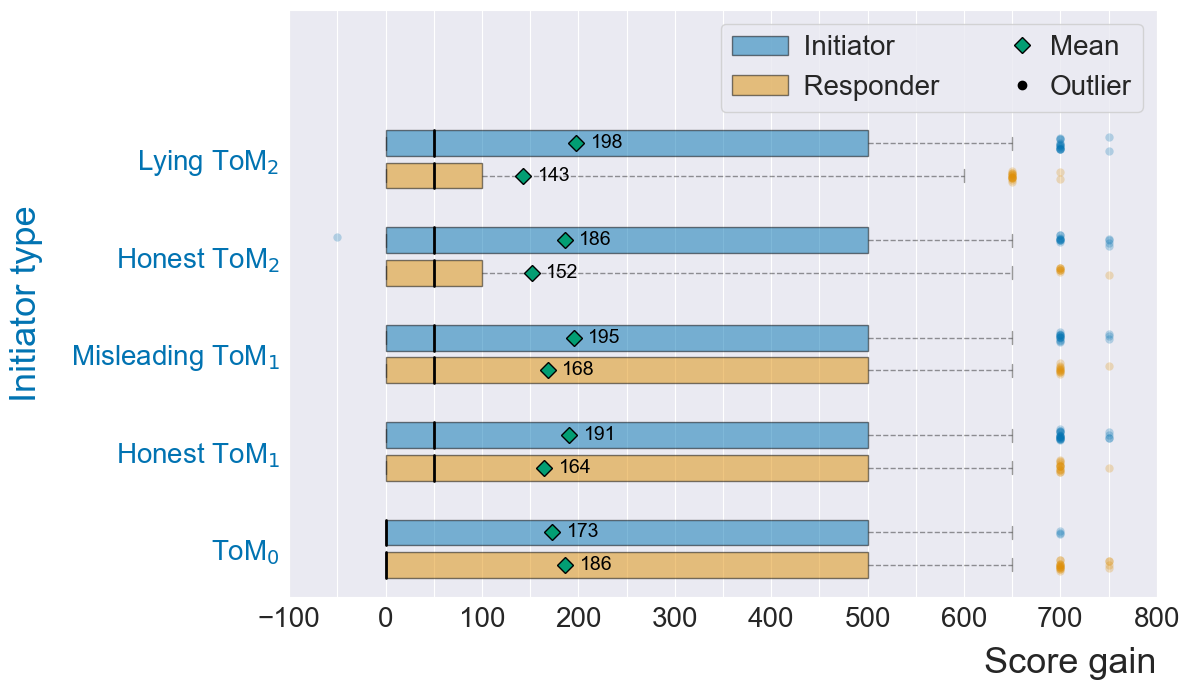

In [9]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25
BETWEEN_SPACE = 1

label_names = ["ToM=0,canLie=True",
               "ToM=1,canLie=False", "ToM=1,canLie=True", 
               "ToM=2,canLie=False", "ToM=2,canLie=True"]
fig_label_names = [r"ToM$_0$",
                   r"Honest ToM$_1$",
                   r"Misleading ToM$_1$",
                   r"Honest ToM$_2$", 
                   r"Lying ToM$_2$"]

Y_TICKS = [(1 + INNER_HALFSPACE*2) + x*(BETWEEN_SPACE+2*INNER_HALFSPACE) for x in range(len(label_names))]
figsize = (12, 7)

# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        plt.setp(bp[element][1], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    plt.setp(bp['fliers'][1], color='black', alpha=0)

    bp['boxes'][0].set(facecolor=INIT_COL)
    bp['boxes'][1].set(facecolor=RESP_COL)
    
    fill_colors = [INIT_COL, RESP_COL]
    for i in [0,1]:
        top_points = bp["fliers"][i].get_data()
        x = top_points[0]
        y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
        ax.scatter(x, y, color=fill_colors[i], alpha=0.25, linewidth=0)
        
        # y = np.random.normal(pos[i], 0.05, size=len(data[i]))
        # x = data[i]
        # ax.scatter(x, y, color=INIT_COL, alpha=0.1, linewidth=0)
        
    

def make_multiple_boxplots(df, y_label):
    fig, ax = plt.subplots(figsize = figsize)
    
    for idx, label_name in enumerate(label_names):
        plot_data = [list(df[df["id"] == label_name]["init_gain"]),
                     list(df[df["id"] == label_name]["resp_gain"])]
        make_box_plot(plot_data, [Y_TICKS[idx]+INNER_HALFSPACE, Y_TICKS[idx]-INNER_HALFSPACE], ax)
        
        mean_value = np.mean(plot_data[0])
        plt.text(mean_value+15, Y_TICKS[idx]+INNER_HALFSPACE,
                 str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",
        # print("mean initiator = " + str(mean_value))
        
        mean_value = np.mean(plot_data[1])
        plt.text(mean_value+15, Y_TICKS[idx]-INNER_HALFSPACE,
                 str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center')
        # print("mean responder = " + str(mean_value))

    ax.set_yticks(Y_TICKS)
    ax.set_yticklabels(fig_label_names)
    # plt.setp(ax.yaxis.get_majorticklabels(), ha='left')
    # ax.yaxis.set_tick_params(pad=1.6*max(T.label1.get_window_extent().width for T in ax.yaxis.majorTicks))
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 2.3))
    
    ax.legend((mpatches.Patch(facecolor=INIT_COL, edgecolor='black', label="Initiator", alpha=boxprops["alpha"]),
               mpatches.Patch(facecolor=RESP_COL, edgecolor='black', label="Responder", alpha=boxprops["alpha"]),
               plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
              ("  Initiator", "  Responder", "Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    
    ax.set_xlabel('Score gain', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel(y_label, fontsize=LABEL_SIZE, labelpad=20)
    if y_label == "Initiator type":
        ax.yaxis.label.set_color(INIT_COL)
        ax.tick_params(axis='y', colors=INIT_COL)
    else:
        ax.yaxis.label.set_color(RESP_COL)
        ax.tick_params(axis='y', colors=RESP_COL)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    # plt.minorticks_on()
    
    return fig, ax

def create_boxplot_figure(data, player_name: str, tom: int, can_lie: bool, pareto: bool):
    if pareto:
        data = data.loc[(data["init_highestValueParetoOutcome"] != -1) & (data["resp_highestValueParetoOutcome"] != -1)]
    fig_data = data.loc[(data[player_name + "_tom"] == tom) & (data[player_name + "_canLie"] == can_lie)] # & (data["there_is_better_outcome_than_initial_situ"] == True)

    if player_name == "init":
        df = fig_data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]].copy()
        df["id"] = df.apply(lambda x: "ToM=" + str(x['resp_tom']) + ",canLie=" + str(x['resp_canLie']), axis=1)
        df = df[["id", "init_gain", "resp_gain"]]
        make_multiple_boxplots(df, "Responder type")
    
    elif player_name == "resp":
        df = fig_data[["init_tom", "init_canLie", "init_gain", "resp_gain"]].copy()
        df["id"] = df.apply(lambda x: "ToM=" + str(x['init_tom']) + ",canLie=" + str(x['init_canLie']), axis=1)
        df = df[["id", "init_gain", "resp_gain"]]
        make_multiple_boxplots(df, "Initiator type")

    if pareto:
        plt.savefig(figure_path + "savedfig_" + player_name + str(tom) + str(can_lie) + "_" + ID + "_pareto.pdf")
    else:
        plt.savefig(figure_path + "savedfig_" + player_name + str(tom) + str(can_lie) + "_" + ID + ".pdf")
    
# create all figures
all_combi = list(itertools.product(*[["init", "resp"], [1,2], [True, False]]))
all_combi.append(("init", 0, True))
all_combi.append(("resp", 0, True))

for combi in all_combi:
    print(combi)
    create_boxplot_figure(data, combi[0], combi[1], combi[2], False)
    # create_boxplot_figure(data, combi[0], combi[1], combi[2], True)

In [10]:
print(f'Number of times limit of 100 offers is reached: {len(data.loc[(data["reached_max_num_offers"] == True)])}')
print()

print(f"Total number of data points: {len(data)}")
print(f"Total number of data points with Pareto improvement: {len(data.loc[(data['init_highestValueParetoOutcome'] != -1)])}")
print(f"Total number of data points with strict Pareto improvement: {len(data.loc[(data['init_highestValueStrictParetoOutcome'] != -1)])}")
print()

print(f"Percentage of data with pareto improvement: {len(data.loc[(data['init_highestValueParetoOutcome'] != -1)]) / len(data) * 100}")
print(f"Percentage of data with strict pareto improvement: {len(data.loc[(data['init_highestValueStrictParetoOutcome'] != -1)]) / len(data) * 100}")
print()

print(f"Percentage of data with new deal: {len(data.loc[(data['outcome_is_new_distribution'] == True)]) / len(data) * 100}")
print(f"Percentage of data with new deal where there is pareto improvement: {len(data.loc[(data['outcome_is_new_distribution'] == True) & (data['init_highestValueParetoOutcome'] != -1)]) / len(data.loc[(data['init_highestValueParetoOutcome'] != -1)]) * 100}")
print(f"Percentage of data with new deal where there is a strict pareto improvement: {len(data.loc[(data['outcome_is_new_distribution'] == True) & (data['init_highestValueStrictParetoOutcome'] != -1)]) / len(data.loc[(data['init_highestValueStrictParetoOutcome'] != -1)]) * 100}")
print()

print(f"Number of data points where there is a new distribution without a strict pareto improvement: {len(data.loc[(data['outcome_is_new_distribution']) & (data['init_highestValueStrictParetoOutcome'] == -1)])}")
print(f"Number of data points where there is a new distribution without a pareto improvement: {len(data.loc[(data['outcome_is_new_distribution']) & (data['init_highestValueParetoOutcome'] == -1)])}")
print()

print(f'Percentage of offers that are terminated instantaneously: {len(data.loc[data["nr_offers"] == 0]) / len(data)}')


Number of times limit of 100 offers is reached: 0

Total number of data points: 24825
Total number of data points with Pareto improvement: 19352
Total number of data points with strict Pareto improvement: 13850

Percentage of data with pareto improvement: 77.95367573011077
Percentage of data with strict pareto improvement: 55.79053373615307

Percentage of data with new deal: 54.0503524672709
Percentage of data with new deal where there is pareto improvement: 69.33650268706076
Percentage of data with new deal where there is a strict pareto improvement: 96.49819494584837

Number of data points where there is a new distribution without a strict pareto improvement: 53
Number of data points where there is a new distribution without a pareto improvement: 0

Percentage of offers that are terminated instantaneously: 0.1067472306143001


In [11]:
print(f'Number of data points where there is a new distribution but the initiator or responder did not gain score: {len(data.loc[((data["init_gain"] <= 0) | (data["resp_gain"] <= 0)) & data["outcome_is_new_distribution"]])}')
print(f'Number of data points where there is a new distribution and Pareto improvement but the initiator or responder did not gain score: {len(data.loc[((data["init_gain"] <= 0) | (data["resp_gain"] <= 0)) & data["outcome_is_new_distribution"] & (data["init_highestValueParetoOutcome"] != -1)])}')
print(f'Number of data points where there is a new distribution and strict Pareto improvement but the initiator or responder did not gain score: {len(data.loc[((data["init_gain"] <= 0) | (data["resp_gain"] <= 0)) & data["outcome_is_new_distribution"] & (data["init_highestValueStrictParetoOutcome"] != -1)])}')

Number of data points where there is a new distribution but the initiator or responder did not gain score: 64
Number of data points where there is a new distribution and Pareto improvement but the initiator or responder did not gain score: 64
Number of data points where there is a new distribution and strict Pareto improvement but the initiator or responder did not gain score: 11


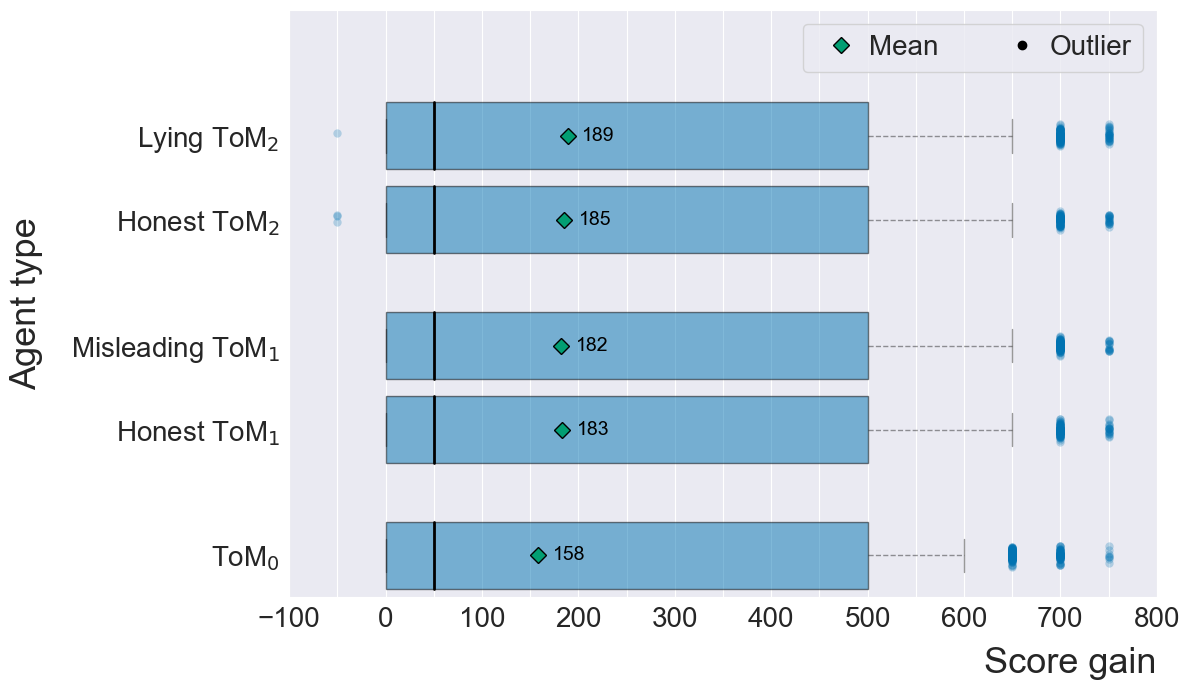

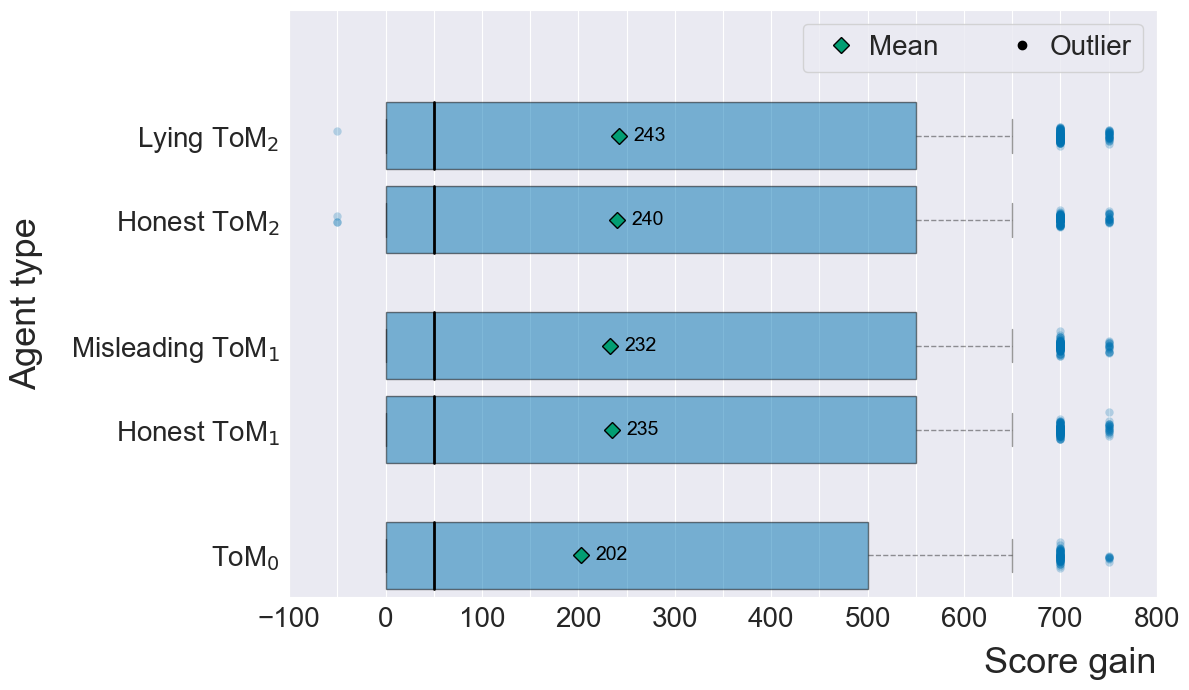

In [12]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.8

plot_points = [(0, 0, True), (1.5, 1, False), (2.5, 1, True), (4, 2, False), (5, 2, True)]
fig_label_names = [r"ToM$_0$",
                   r"Honest ToM$_1$",
                   r"Misleading ToM$_1$",
                   r"Honest ToM$_2$", 
                   r"Lying ToM$_2$"]

figsize = (12, 7)

# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    
    top_points = bp["fliers"][0].get_data()
    x = top_points[0]
    y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
    ax.scatter(x, y, color=INIT_COL, alpha=0.25, linewidth=0)
        

def make_multiple_boxplots(df):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom, canLie in plot_points:
        plot_data = list(df[(df["init_tom"] == tom) & (df["init_canLie"] == canLie)]["init_gain"])
        plot_data.extend(list(df[(df["resp_tom"] == tom) & (df["resp_canLie"] == canLie)]["resp_gain"]))
        make_box_plot(plot_data, [pos], ax)
        
        mean_value = np.mean(plot_data)
        plt.text(mean_value+15, pos, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",

    y_ticks = [i for i, _, _ in plot_points]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 1.5))
    
    ax.legend((plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
              ("Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    
    ax.set_xlabel('Score gain', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    return fig, ax

make_multiple_boxplots(data)
plt.savefig(figure_path + "boxplot_average.pdf")

make_multiple_boxplots(data.loc[(data["init_highestValueParetoOutcome"] != -1) & (data["resp_highestValueParetoOutcome"] != -1)])
plt.savefig(figure_path + "boxplot_average_pareto.pdf")

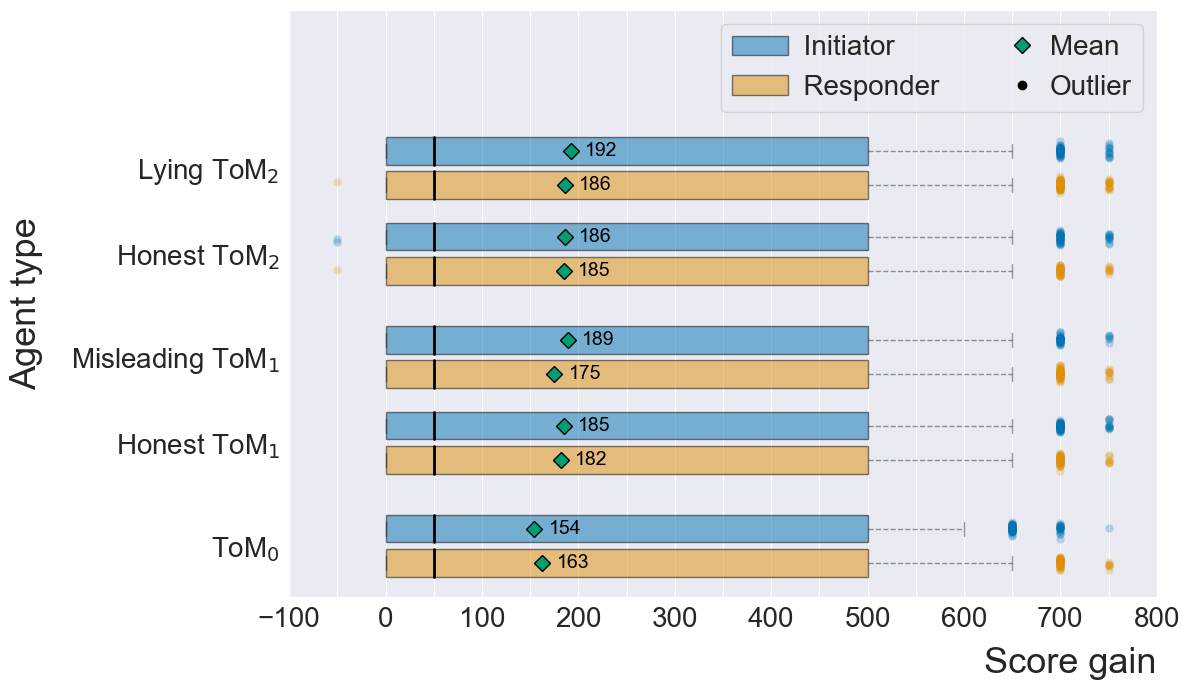

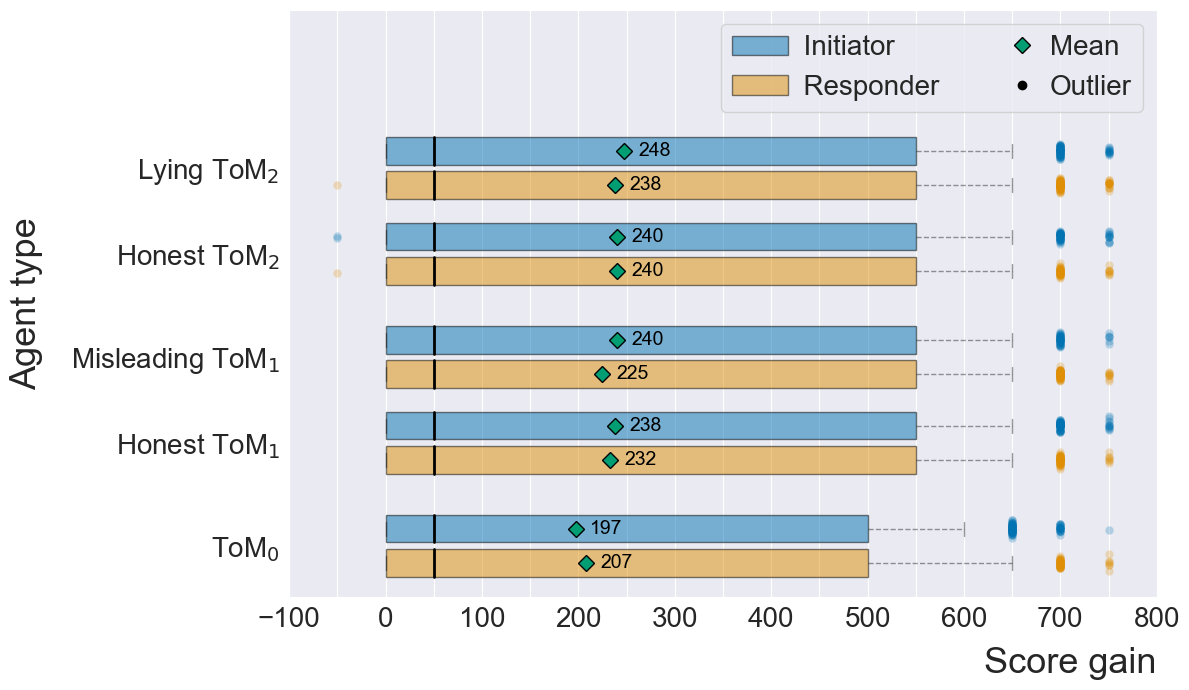

In [13]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25

plot_points = [(0, 0, True), (1.5, 1, False), (2.75, 1, True), (4.25, 2, False), (5.5, 2, True)]
fig_label_names = [r"ToM$_0$",
                   r"Honest ToM$_1$",
                   r"Misleading ToM$_1$",
                   r"Honest ToM$_2$", 
                   r"Lying ToM$_2$"]

figsize = (12, 7)

# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True, whis=[2.5, 97.5],
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        plt.setp(bp[element][1], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    plt.setp(bp['fliers'][1], color='black', alpha=0)
    bp['boxes'][0].set(facecolor=INIT_COL)
    bp['boxes'][1].set(facecolor=RESP_COL)
    
    fill_colors = [INIT_COL, RESP_COL]
    for i in [0,1]:
        top_points = bp["fliers"][i].get_data()
        x = top_points[0]
        y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
        ax.scatter(x, y, color=fill_colors[i], alpha=0.25, linewidth=0)
        

def make_multiple_boxplots(df):
    fig, ax = plt.subplots(figsize = figsize)
    
    for pos, tom, canLie in plot_points:
        plot_data = [list(df[(df["init_tom"] == tom) & (df["init_canLie"] == canLie)]["init_gain"]),
                          list(df[(df["resp_tom"] == tom) & (df["resp_canLie"] == canLie)]["resp_gain"])]
        make_box_plot(plot_data, [pos+INNER_HALFSPACE, pos-INNER_HALFSPACE], ax)
        
        mean_value = np.mean(plot_data[0])
        plt.text(mean_value+15, pos+INNER_HALFSPACE, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",

        mean_value = np.mean(plot_data[1])
        plt.text(mean_value+15, pos-INNER_HALFSPACE, str(round((mean_value))), fontsize=VALUE_SIZE, color="black", va='center') # fontweight="bold",


    y_ticks = [i for i, _, _ in plot_points]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 2.3))
    
    ax.legend((mpatches.Patch(facecolor=INIT_COL, edgecolor='black', label="Initiator", alpha=boxprops["alpha"]),
               mpatches.Patch(facecolor=RESP_COL, edgecolor='black', label="Responder", alpha=boxprops["alpha"]),
               plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
              ("  Initiator", "  Responder", "Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper right",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    
    ax.set_xlabel('Score gain', fontsize=LABEL_SIZE, labelpad=10, loc="right")
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    fig.tight_layout()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    return fig, ax

make_multiple_boxplots(data)
plt.savefig(figure_path + "boxplot_average_separate.pdf")

make_multiple_boxplots(data.loc[(data["init_highestValueParetoOutcome"] != -1) & (data["resp_highestValueParetoOutcome"] != -1)])
plt.savefig(figure_path + "boxplot_average_separate_pareto.pdf")

In [14]:
data.columns

Index(['init_tom', 'resp_tom', 'init_lr', 'resp_lr', 'init_canSendMessages',
       'resp_canSendMessages', 'init_canLie', 'resp_canLie', 'init_initPoints',
       'resp_initPoints', 'init_finalPoints', 'resp_finalPoints', 'init_gain',
       'resp_gain', 'init_canInitiallyReachGP', 'resp_canInitiallyReachGP',
       'init_zeroToMProb', 'resp_zeroToMProb', 'init_numberOfMessagesSent',
       'resp_numberOfMessagesSent', 'init_numberOfTimesLied',
       'resp_numberOfTimesLied', 'init_highestValueParetoOutcome',
       'resp_highestValueParetoOutcome',
       'init_highestValueStrictParetoOutcome',
       'resp_highestValueStrictParetoOutcome', 'nr_offers',
       'outcome_is_StrictPE', 'outcome_is_highestSW',
       'outcome_is_new_distribution',
       'there_is_better_outcome_than_initial_situ', 'reached_max_num_offers',
       'passed_time'],
      dtype='object')

In [15]:
data.loc[(data["init_gain"] < 0) | (data["resp_gain"] < 0)][["init_gain", "resp_gain", "init_tom", "resp_tom", "init_numberOfTimesLied", "init_numberOfMessagesSent", "resp_numberOfTimesLied", "resp_numberOfMessagesSent"]]

,init_gain,resp_gain,init_tom,resp_tom,init_numberOfTimesLied,init_numberOfMessagesSent,resp_numberOfTimesLied,resp_numberOfMessagesSent
6375,50,-50,0,2,0,1,0,0
15733,550,-50,0,2,0,0,0,0
39719,-50,550,2,0,0,0,0,0
43790,-50,50,2,1,0,0,0,0


In [24]:
work_data = data.copy()
work_data = work_data.loc[(work_data["init_gain"] >= 0) & (work_data["resp_gain"] >= 0) & (work_data["init_gain"] + work_data["resp_gain"] > 0)]
print(f'Percentage of data points where both gains are greater than or equal to zero and the sum is greater than zero: {len(work_data) / len(data)}')
work_data["init_gainPercent"] = work_data.apply(lambda x: x["init_gain"] / (x["init_gain"] + x["resp_gain"]), axis=1)
work_data["resp_gainPercent"] = work_data.apply(lambda x: x["resp_gain"] / (x["init_gain"] + x["resp_gain"]), axis=1)

df_results = pd.DataFrame(columns=["name", "self_gainPercent", "partner_gainPercent", "self_gain", "partner_gain"])
idx = 0
for index, row in work_data.iterrows():
    
    if ((row["init_tom"] == 1) and (row["init_canLie"] == True)):
        df_results.loc[idx] = ["one_canLie", row["init_gainPercent"], row["resp_gainPercent"], row["init_gain"], row["resp_gain"]]
    elif ((row["init_tom"] == 1) and (row["init_canLie"] == False)):
        df_results.loc[idx] = ["one_cannotLie", row["init_gainPercent"], row["resp_gainPercent"], row["init_gain"], row["resp_gain"]]
    elif ((row["init_tom"] == 2) and (row["init_canLie"] == True)):
        df_results.loc[idx] = ["two_canLie", row["init_gainPercent"], row["resp_gainPercent"], row["init_gain"], row["resp_gain"]]
    elif ((row["init_tom"] == 2) and (row["init_canLie"] == False)):
        df_results.loc[idx] = ["two_cannotLie", row["init_gainPercent"], row["resp_gainPercent"], row["init_gain"], row["resp_gain"]]
    elif(row["init_tom"] == 0):
        df_results.loc[idx] = ["zero", row["init_gainPercent"], row["resp_gainPercent"], row["init_gain"], row["resp_gain"]]
    else:
        print("We cannot be here...")
    idx += 1
        
    if ((row["resp_tom"] == 1) and (row["resp_canLie"] == True)):
        df_results.loc[idx] = ["one_canLie", row["resp_gainPercent"], row["init_gainPercent"], row["resp_gain"], row["init_gain"]]
    elif ((row["resp_tom"] == 1) and (row["resp_canLie"] == False)):
        df_results.loc[idx] = ["one_cannotLie", row["resp_gainPercent"], row["init_gainPercent"], row["resp_gain"], row["init_gain"]]
    elif ((row["resp_tom"] == 2) and (row["resp_canLie"] == True)):
        df_results.loc[idx] = ["two_canLie", row["resp_gainPercent"], row["init_gainPercent"], row["resp_gain"], row["init_gain"]]
    elif ((row["resp_tom"] == 2) and (row["resp_canLie"] == False)):
        df_results.loc[idx] = ["two_cannotLie", row["resp_gainPercent"], row["init_gainPercent"], row["resp_gain"], row["init_gain"]]
    elif(row["resp_tom"] == 0):
        df_results.loc[idx] = ["zero", row["resp_gainPercent"], row["init_gainPercent"], row["resp_gain"], row["init_gain"]]
    else:
        print("We cannot be here...")
    idx += 1

Percentage of data points where both gains are greater than or equal to zero and the sum is greater than zero: 0.5403423967774421


In [25]:
df_work = df_results.groupby("name").agg("mean")
df_work = df_work.reindex(["zero", "one_cannotLie", "one_canLie", "two_cannotLie", "two_canLie"])

C:\Users\sverr\AppData\Local\Temp\ipykernel_9452\821790228.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


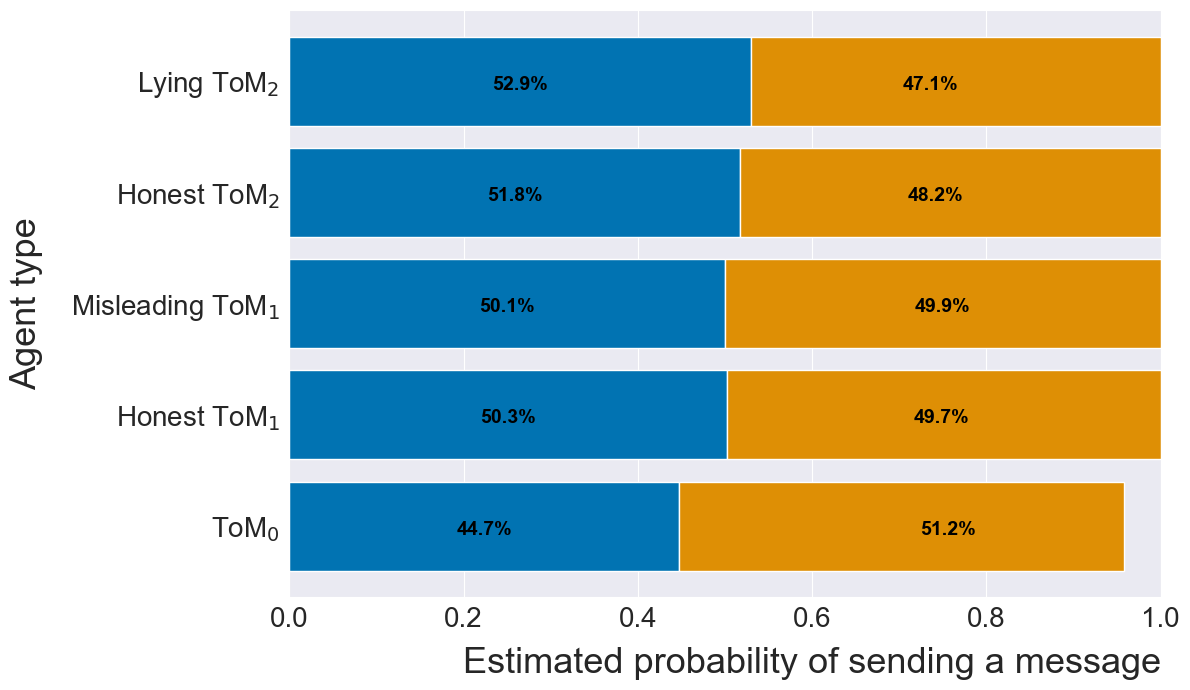

In [48]:
boxprops = dict(color="black", alpha=0.5)
whiskerprops = dict(alpha=0.4, linestyle="dashed")
capprops = dict(alpha=0.4)
medianprops = dict(lw=2, color="black")
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=8)

TICK_SIZE = 20
LABEL_SIZE = 26
VALUE_SIZE = 14
RIGHT_LIM = 800
LEFT_LIM = -100

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25

plot_points = [(0, 0, True), (1.5, 1, False), (2.75, 1, True), (4.25, 2, False), (5.5, 2, True)]

figsize = (12, 7)

# function for setting the colors of the box plots pairs
def make_plot(data):
    fig, ax = plt.subplots(figsize = figsize)
    
    ax.barh(data.index, data["self_gainPercent"], color=INIT_COL)
     
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width() / 2, i.get_y()+0.37,
                f"{round((i.get_width()*100), 1)}%",
                fontsize = VALUE_SIZE, fontweight ='bold',
                color ='black', va='center', ha='center')
        
    ax.barh(data.index, data["partner_gainPercent"], left=data["self_gainPercent"], color=RESP_COL)
    
    # Add annotation to bars
    for idx, i in enumerate(ax.patches):
        if idx < 5: continue
        plt.text(i.get_width() / 2 + 0.5, i.get_y()+0.37,
                f"{round((i.get_width()*100), 1)}%",
                fontsize = VALUE_SIZE, fontweight ='bold',
                color ='black', va='center', ha='center')
        
    
    
    ax.set_xlim(right=1.0, left=0.0)
    
    ax.yaxis.grid(False)
    ax.xaxis.grid(True, which="both")
    
    y_labels = [r"ToM$_0$",
                r"Honest ToM$_1$",
                r"Misleading ToM$_1$", 
                r"Honest ToM$_2$",
                r"Lying ToM$_2$"]
    
    ax.set_yticklabels(y_labels)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    
    ax.set_ylabel("Agent type", fontsize=LABEL_SIZE, labelpad=20)
    ax.set_xlabel("Fraction of social welfare gain", fontsize=LABEL_SIZE, loc="right", labelpad=10)
    
    fig.tight_layout()

make_plot(df_work)
# plt.savefig(figure_path + "boxplot_average_separate.pdf")

In [18]:
# # function for setting the colors of the box plots pairs
# def make_violin_plot(data, pos, ax):
#     bp = ax.violinplot(data, positions=pos, vert=0, widths = BIN_WIDTH, showextrema=False)
    
#     # for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
#         # plt.setp(bp[element][0], color='black')
#         # plt.setp(bp[element][1], color='black')
        
#     # plt.setp(bp['fliers'][0], color='black', alpha=0)
#     # plt.setp(bp['fliers'][1], color='black', alpha=0)

#     fill_colors = [INIT_COL, RESP_COL]
#     for i in [0,1]:
#         bp["bodies"][i].set_facecolor(fill_colors[i])
#         bp["bodies"][i].set_edgecolor("black")
#         bp["bodies"][i].set_alpha(0.5)
#         ax.scatter(np.mean(data[i]), pos[i], 
#                    marker=meanpointprops["marker"], color=meanpointprops["markerfacecolor"], 
#                    edgecolors=meanpointprops["markeredgecolor"], s=meanpointprops["markersize"]**2)
    
    

# def make_multiple_violins(df, y_label, title):
#     fig, ax = plt.subplots(figsize = figsize)
    
#     for idx, label_name in enumerate(label_names):
#         plot_data = [list(df[df["id"] == label_name]["init_gain"]),
#                      list(df[df["id"] == label_name]["resp_gain"])]
        
#         make_violin_plot(plot_data, [Y_TICKS[idx]+INNER_HALFSPACE, Y_TICKS[idx]-INNER_HALFSPACE], ax)

#     ax.set_yticks(Y_TICKS)
#     ax.set_yticklabels(fig_label_names)
#     plt.setp(ax.yaxis.get_majorticklabels(), ha='left')
#     ax.yaxis.set_tick_params(pad=1.6*max(T.label1.get_window_extent().width for T in ax.yaxis.majorTicks))
#     ax.tick_params(axis='both', labelsize=TICK_SIZE)
#     ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
#     ax.set_ylim((None, ax.get_yticks()[-1] + 2.3))
    
#     ax.legend((mpatches.Patch(facecolor=INIT_COL, edgecolor='black', label="Initiator", alpha=0.5),
#                mpatches.Patch(facecolor=RESP_COL, edgecolor='black', label="Responder", alpha=0.5),
#                plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
#                           markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
#                plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
#               ("Initiator", "Responder", "Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper center",
#               handletextpad=1)
#     ax.xaxis.grid(True, which="both")
#     ax.yaxis.grid(False, which="both")
    
    
#     fig.supxlabel('Score gain', fontsize=LABEL_SIZE)
#     fig.supylabel(y_label, x=0, fontsize=LABEL_SIZE)
#     fig.suptitle(title, fontstyle='italic', fontsize=TITLE_SIZE)
#     fig.tight_layout()
#     plt.minorticks_on()
    
#     return fig, ax

# player_name = "init"
# tom = 2
# can_lie = True
# fig_data = data.loc[(data[player_name + "_tom"] == tom) & (data[player_name + "_canLie"] == can_lie)] # & (data["there_is_better_outcome_than_initial_situ"] == True)
# df = fig_data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]].copy()
# df["id"] = df.apply(lambda x: "ToM=" + str(x['resp_tom']) + ",canLie=" + str(x['resp_canLie']), axis=1)
# df = df[["id", "init_gain", "resp_gain"]]
# make_multiple_violins(df, "Responder Type", "title")

In [19]:
# # function for setting the colors of the box plots pairs
# def make_density_plot(data, ax):
    
#     # sns.histplot(data=data, x = "value", hue="variable", ax=ax)
#     sns.kdeplot(data=data, x = "value", hue="variable", ax=ax, fill=True, alpha=.2, linewidth=1, bw_adjust=.2, multiple="layer")
#     ax.set(xlabel=None)
#     ax.set(ylabel="1")
    

# def make_multiple_densityplots(df, y_label, title):
#     fig, ax = plt.subplots(6, figsize = figsize, sharex=True, sharey=True)
    
#     for idx, label_name in enumerate(label_names):
#         plot_data = df.loc[df["id"] == label_name][["init_gain", "resp_gain"]]
#         plot_data = pd.melt(plot_data, value_vars=["init_gain", "resp_gain"])
        
#         make_density_plot(plot_data, ax[idx])
    
#     fig.supxlabel('Score gain', fontsize=LABEL_SIZE)
#     fig.supylabel(y_label, x=0, fontsize=LABEL_SIZE)
#     fig.suptitle(title, fontstyle='italic', fontsize=TITLE_SIZE)
#     fig.tight_layout()
#     plt.minorticks_on()
    
#     return fig, ax

# player_name = "init"
# tom = 0
# can_lie = False
# fig_data = data.loc[(data[player_name + "_tom"] == tom) & (data[player_name + "_canLie"] == can_lie)] # & (data["there_is_better_outcome_than_initial_situ"] == True)
# df = fig_data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]].copy()
# df["id"] = df.apply(lambda x: "ToM=" + str(x['resp_tom']) + ",canLie=" + str(x['resp_canLie']), axis=1)
# df = df[["id", "init_gain", "resp_gain"]]
# make_multiple_densityplots(df, "Responder type", "title")

In [20]:
# plot_data = df.loc[df["id"] == label_names[0]][["init_gain", "resp_gain"]]
# print(pd.melt(plot_data, value_vars=["init_gain", "resp_gain"]))